In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_json('../data/sample_small.json', lines=True)

In [3]:
df.head()

,ts,visitor_uuid,visitor_source,visitor_device,visitor_useragent,visitor_ip,visitor_country,visitor_referrer,env_type,env_doc_id,event_type,subject_type,subject_doc_id,subject_page,cause_type,event_readtime,env_ranking,env_build,env_name,env_component,visitor_username,event_index,subject_infoboxid,subject_url,cause_position,cause_adid,env_adid,cause_embedid
0,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,0.0,impression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,1.0,page,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,2.0,NaN,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,3.0,NaN,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393631983,232eeca785873d35,internal,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,fcf9c67037f993f0,MX,63765fcd2ff864fd,stream,NaN,impression,doc,100713205147-2ee05a98f1794324952eea5ca678c026,1.0,NaN,NaN,10.0,1.7.118-b946,explore,editors_picks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_count = df[['visitor_uuid','visitor_country','env_doc_id']]
df_count.head()

In [ ]:
df_count = df_count.loc[df_count['env_doc_id'] == "140222143932-91796b01f94327ee809bd759fd0f6c76"]

In [ ]:
df_count['visitor_uuid'] = df_count['visitor_uuid'].drop_duplicates()

In [ ]:
df_count = df_count[['visitor_uuid','visitor_country']]

In [ ]:
df_count_gp = df_count.groupby(by='visitor_country').count().sort_values(by='visitor_uuid', ascending=False).reset_index()

In [ ]:
df_count_gp.head(10)

In [ ]:
df_count_gp.plot(kind='bar', x='visitor_country')

In [ ]:
fig, ax = plt.subplots()
ax.bar(x=df_count_gp['visitor_country'], y=df_count_gp['visitor_uuid'], height=1)
plt.show()

In [ ]:
def doc_by_country(uuid="140222143932-91796b01f94327ee809bd759fd0f6c76"):
    df = pd.read_json('../data/sample_small.json', lines=True)
    df_count = df[['visitor_uuid','visitor_country','env_doc_id']]
    df_count = df_count.loc[df_count['env_doc_id'] == uuid]
    df_count['visitor_uuid'] = df_count['visitor_uuid'].drop_duplicates()
    df_count = df_count[['visitor_uuid','visitor_country']]
    df_count_gp = df_count.groupby(by='visitor_country').count().sort_values(by='visitor_uuid', ascending=False).reset_index()
    chart = df_count_gp.plot(kind='bar', x='visitor_country')
    return chart

In [ ]:
doc_by_country()

In [ ]:
from doc import doc_by_country

chart = doc_by_country('140224195414-e5a9acedd5eb6631bb6b39422fba6798')

In [ ]:
v = df_count['env_doc_id'].value_counts().reset_index()

In [ ]:
s = v.iloc[0, 0]

In [ ]:
len(s)

In [ ]:
df['visitor_country'].value_counts().reset_index()
df['Continent'] = 'none'

In [ ]:
df.loc[df['visitor_country'] == 'BR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'US', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'MX', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'CA', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'GB', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'ES', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PE', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'IT', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'CO', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'CL', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'AU', 'Continent'] = 'Australia & Oceania'
df.loc[df['visitor_country'] == 'AR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'RU', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'FR', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PT', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'PL', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'NL', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'SV', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'DE', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'EC', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'KR', 'Continent'] = 'Asia'
df.loc[df['visitor_country'] == 'GT', 'Continent'] = 'Noth America'
df.loc[df['visitor_country'] == 'JP', 'Continent'] = 'Asia'
df.loc[df['visitor_country'] == 'UA', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'CR', 'Continent'] = 'South America'
df.loc[df['visitor_country'] == 'IS', 'Continent'] = 'Europe'
df.loc[df['visitor_country'] == 'RS', 'Continent'] = 'Europe'


In [ ]:
df['visitor_country'].value_counts().reset_index()

In [4]:
df['visitor_useragent'].head()

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
2    Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...
3    Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: visitor_useragent, dtype: object

### Browser function test

In [231]:
df_brw = df[['visitor_useragent']]

In [232]:
df_brw = df_brw['visitor_useragent'].str.split(n=10, expand=True)

In [233]:
df_brw[0] = df_brw[0].str.findall(r'[A-Z][a-z]+')

In [235]:
df_brw[0] = df_brw[0].apply(lambda x: ','.join(map(str, x)))

In [236]:
df_brw

,0,1,2,3,4,5,6,7,8,9,10
0,Mozilla,(Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
1,Mozilla,(Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
2,Opera,(Windows,NT,6.1),Presto/2.12.388,Version/12.16,None,None,None,None,None
3,Opera,(Windows,NT,6.1),Presto/2.12.388,Version/12.16,None,None,None,None,None
4,Mozilla,(Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
...,...,...,...,...,...,...,...,...,...,...,...
10235,Mozilla,(Macintosh;,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10236,Mozilla,(Macintosh;,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10237,Mozilla,(Macintosh;,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10238,Mozilla,(Macintosh;,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None


In [238]:
df_brw[1] = df_brw[1].str.replace('(', '')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12364\2408512087.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_brw[1] = df_brw[1].str.replace('(', '')


In [240]:
df_brw[1] = df_brw[1].str.replace(';', '')

In [241]:
df_brw

,0,1,2,3,4,5,6,7,8,9,10
0,Mozilla,Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
1,Mozilla,Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
2,Opera,Windows,NT,6.1),Presto/2.12.388,Version/12.16,None,None,None,None,None
3,Opera,Windows,NT,6.1),Presto/2.12.388,Version/12.16,None,None,None,None,None
4,Mozilla,Windows,NT,6.1;,WOW64),AppleWebKit/537.36,"(KHTML,",like,Gecko),Chrome/33.0.1750.117,Safari/537.36
...,...,...,...,...,...,...,...,...,...,...,...
10235,Mozilla,Macintosh,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10236,Mozilla,Macintosh,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10237,Mozilla,Macintosh,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None
10238,Mozilla,Macintosh,Intel,Mac,OS,X,10.9;,rv:27.0),Gecko/20100101,Firefox/27.0,None


In [257]:
df_brw_1 = df_brw[0].value_counts().reset_index()

In [258]:
df_brw_1

,index,0
0,Mozilla,10127
1,Opera,107
2,Dalvik,5
3,,1


In [259]:
df_brw_1 = df_brw_1.rename(columns={'index':'Browser'})
df_brw_1 = df_brw_1.rename(columns={0:'Count'})

In [260]:
df_brw_1

,Browser,Count
0,Mozilla,10127
1,Opera,107
2,Dalvik,5
3,,1


In [244]:
df_brw[1].value_counts()

Windows       6649
compatible     804
Macintosh      765
iPad           726
Linux          700
iPhone         485
X11             62
BB10            29
Unknown          7
BlackBerry       6
Android          4
Series40         2
iPod             1
Name: 1, dtype: int64

done...


RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.

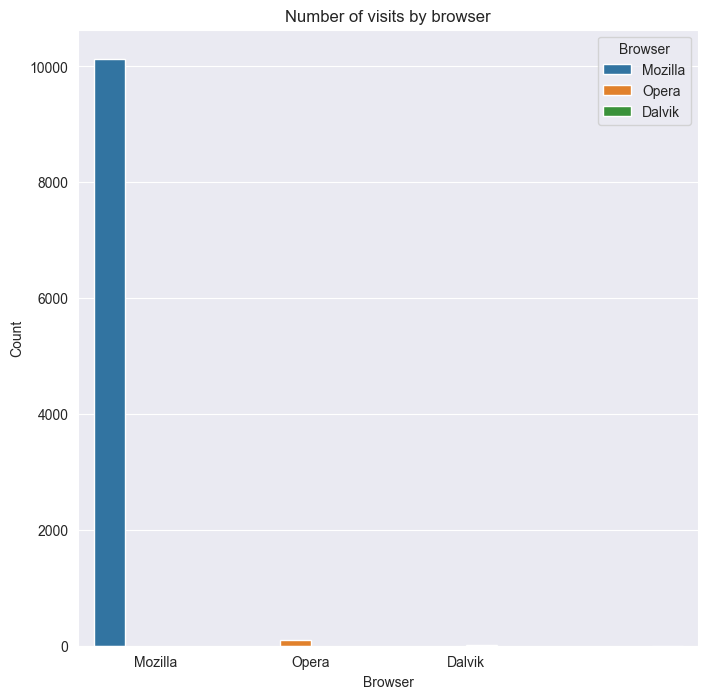

In [2]:
from browser import by_os, by_borw

by_borw()

## Time spent by user (reader)

In [6]:
df = pd.read_json('../data/sample_small.json', lines=True)

In [7]:
df.head()

,ts,visitor_uuid,visitor_source,visitor_device,visitor_useragent,visitor_ip,visitor_country,visitor_referrer,env_type,env_doc_id,event_type,subject_type,subject_doc_id,subject_page,cause_type,event_readtime,env_ranking,env_build,env_name,env_component,visitor_username,event_index,subject_infoboxid,subject_url,cause_position,cause_adid,env_adid,cause_embedid
0,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,0.0,impression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393631983,04daa9ed9dde73d3,external,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,6a3273d508a9de04,ES,64f729926497515c,reader,140224195414-e5a9acedd5eb6631bb6b39422fba6798,impression,doc,140224195414-e5a9acedd5eb6631bb6b39422fba6798,1.0,page,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,2.0,NaN,1035.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393631983,ade7e1f63bc83c66,external,browser,Opera/9.80 (Windows NT 6.1) Presto/2.12.388 Ve...,b5af0ba608ab307c,BR,53c643c16e8253e7,reader,140222143932-91796b01f94327ee809bd759fd0f6c76,pagereadtime,doc,140222143932-91796b01f94327ee809bd759fd0f6c76,3.0,NaN,1010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393631983,232eeca785873d35,internal,browser,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,fcf9c67037f993f0,MX,63765fcd2ff864fd,stream,NaN,impression,doc,100713205147-2ee05a98f1794324952eea5ca678c026,1.0,NaN,NaN,10.0,1.7.118-b946,explore,editors_picks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_time = df[['visitor_uuid','event_readtime']]

In [9]:
df_time.head()

,visitor_uuid,event_readtime
0,04daa9ed9dde73d3,NaN
1,04daa9ed9dde73d3,NaN
2,ade7e1f63bc83c66,1035.0
3,ade7e1f63bc83c66,1010.0
4,232eeca785873d35,NaN


In [10]:
df_time['event_readtime'] = df_time['event_readtime'].fillna(0)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6104\2340590809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time['event_readtime'] = df_time['event_readtime'].fillna(0)


In [11]:
df_time.head()

,visitor_uuid,event_readtime
0,04daa9ed9dde73d3,0.0
1,04daa9ed9dde73d3,0.0
2,ade7e1f63bc83c66,1035.0
3,ade7e1f63bc83c66,1010.0
4,232eeca785873d35,0.0


In [16]:
df_time_tot = df_time.groupby(by='visitor_uuid').sum().reset_index().sort_values(by='event_readtime', ascending=False)

In [18]:
df_time_tot.head(10)

,visitor_uuid,event_readtime
1181,e529f034d3430af2,5356278.0
1135,dd326898d5605e63,648318.0
346,458999cbf4307f34,576177.0
689,849bb060cb110347,486053.0
1150,df70cddbd46fd5da,239350.0
95,14e1e343078d3d75,161381.0
150,2105dd9bc68afb9d,109458.0
1121,da0df8a63107e139,98291.0
964,b9caded38e707eca,98183.0
1165,e1178362fc11d6ba,98172.0


In [19]:
df_time_tot['event_readtime'] = df_time_tot['event_readtime'] / 60000

In [23]:
df_time_tot.head(10)

,User UUID,Time spent in Mins
1181,e529f034d3430af2,89.271300
1135,dd326898d5605e63,10.805300
346,458999cbf4307f34,9.602950
689,849bb060cb110347,8.100883
1150,df70cddbd46fd5da,3.989167
95,14e1e343078d3d75,2.689683
150,2105dd9bc68afb9d,1.824300
1121,da0df8a63107e139,1.638183
964,b9caded38e707eca,1.636383
1165,e1178362fc11d6ba,1.636200


In [22]:
df_time_tot = df_time_tot.rename(columns={'visitor_uuid':'User UUID','event_readtime':'Time spent in Mins'})

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.set_style(style = "darkgrid")